In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/kbo_info.csv')
df1

,경기날짜,팀1이름,팀2이름,팀1점수,팀2점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080330,롯데,한화,9,8
4,20080330,넥센,두산,1,4
...,...,...,...,...,...
9508,20211110,삼성,두산,3,11
9509,20211114,두산,KT,2,4
9510,20211115,두산,KT,1,6
9511,20211117,KT,두산,3,1


### 결측치 확인 및 처리

In [3]:
df1.isna().sum()

경기날짜    0
팀1이름    0
팀2이름    0
팀1점수    0
팀2점수    0
dtype: int64

### 데이터 전처리

In [4]:
df1

,경기날짜,팀1이름,팀2이름,팀1점수,팀2점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080330,롯데,한화,9,8
4,20080330,넥센,두산,1,4
...,...,...,...,...,...
9508,20211110,삼성,두산,3,11
9509,20211114,두산,KT,2,4
9510,20211115,두산,KT,1,6
9511,20211117,KT,두산,3,1


In [5]:
# 데이터 프레임을 복제해 팀1과 팀2의 순서를 바꿔 합친다.
df2 = df1.copy()

df2.columns = ['경기날짜', '팀2이름', '팀1이름', '팀2점수', '팀1점수']
df2

,경기날짜,팀2이름,팀1이름,팀2점수,팀1점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080330,롯데,한화,9,8
4,20080330,넥센,두산,1,4
...,...,...,...,...,...
9508,20211110,삼성,두산,3,11
9509,20211114,두산,KT,2,4
9510,20211115,두산,KT,1,6
9511,20211117,KT,두산,3,1


In [6]:
# 합친다.
df4 = pd.concat([df1, df2])

# 인덱스를 초기화 한다.
# drop에 True를 넣지 않으면 이전의 인덱스가 컬럼에 포함된다.
df4.reset_index(inplace=True, drop=True)
df4

,경기날짜,팀1이름,팀2이름,팀1점수,팀2점수
0,20080329,롯데,한화,11,1
1,20080329,LG,SK,4,5
2,20080329,KIA,삼성,3,4
3,20080330,롯데,한화,9,8
4,20080330,넥센,두산,1,4
...,...,...,...,...,...
19021,20211110,두산,삼성,11,3
19022,20211114,KT,두산,4,2
19023,20211115,KT,두산,6,1
19024,20211117,두산,KT,1,3


In [7]:
# 경기결과를 담을 컬럼을 추가한다.
df4['결과'] = 0
df4

,경기날짜,팀1이름,팀2이름,팀1점수,팀2점수,결과
0,20080329,롯데,한화,11,1,0
1,20080329,LG,SK,4,5,0
2,20080329,KIA,삼성,3,4,0
3,20080330,롯데,한화,9,8,0
4,20080330,넥센,두산,1,4,0
...,...,...,...,...,...,...
19021,20211110,두산,삼성,11,3,0
19022,20211114,KT,두산,4,2,0
19023,20211115,KT,두산,6,1,0
19024,20211117,두산,KT,1,3,0


In [8]:
# 이긴 경기는 결과를 1로 채워준다.
# 이긴 경기에 대한 인덱스를 구한다.
a1 = df4.query('팀1점수 > 팀2점수').index

# 1로 채워준다.
df4.loc[a1, '결과'] = 1

df4['결과'].value_counts()

0    9775
1    9251
Name: 결과, dtype: int64

In [9]:
# 팀 이름 확인
df4['팀1이름'].value_counts()

두산     2131
삼성     2070
LG     2058
롯데     2052
KIA    2039
한화     2029
SK     1933
NC     1389
넥센     1194
키움      878
KT      595
kt      486
SSG     152
드림        7
나눔        7
웨스턴       3
이스턴       3
Name: 팀1이름, dtype: int64

In [10]:
# SK와 SSG의 팀 이름은 SK_SSG..
a1 = df4.query('팀1이름 == "SSG" or 팀1이름 == "SK"').index
df4.loc[a1, '팀1이름'] = 'SK_SSG'

a1 = df4.query('팀2이름 == "SSG" or 팀2이름 == "SK"').index
df4.loc[a1, '팀2이름'] = 'SK_SSG'

display(df4['팀1이름'].value_counts())
display(df4['팀2이름'].value_counts())

두산        2131
SK_SSG    2085
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
넥센        1194
키움         878
KT         595
kt         486
나눔           7
드림           7
웨스턴          3
이스턴          3
Name: 팀1이름, dtype: int64

두산        2131
SK_SSG    2085
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
넥센        1194
키움         878
KT         595
kt         486
드림           7
나눔           7
이스턴          3
웨스턴          3
Name: 팀2이름, dtype: int64

In [11]:
# 넥센과 키움을 넥센_키움으로 변경한다.
a1 = df4.query('팀1이름 == "넥센" or 팀1이름 == "키움"').index
df4.loc[a1, '팀1이름'] = '넥센_키움'

a1 = df4.query('팀2이름 == "넥센" or 팀2이름 == "키움"').index
df4.loc[a1, '팀2이름'] = '넥센_키움'

display(df4['팀1이름'].value_counts())
display(df4['팀2이름'].value_counts())

두산        2131
SK_SSG    2085
넥센_키움     2072
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
KT         595
kt         486
나눔           7
드림           7
웨스턴          3
이스턴          3
Name: 팀1이름, dtype: int64

두산        2131
SK_SSG    2085
넥센_키움     2072
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
KT         595
kt         486
드림           7
나눔           7
이스턴          3
웨스턴          3
Name: 팀2이름, dtype: int64

In [12]:
# kt 를 KT로...
a1 = df4.query('팀1이름 == "kt"').index
df4.loc[a1, '팀1이름'] = 'KT'

a1 = df4.query('팀2이름 == "kt"').index
df4.loc[a1, '팀2이름'] = 'KT'

display(df4['팀1이름'].value_counts())
display(df4['팀2이름'].value_counts())

두산        2131
SK_SSG    2085
넥센_키움     2072
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
KT        1081
나눔           7
드림           7
웨스턴          3
이스턴          3
Name: 팀1이름, dtype: int64

두산        2131
SK_SSG    2085
넥센_키움     2072
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
KT        1081
드림           7
나눔           7
이스턴          3
웨스턴          3
Name: 팀2이름, dtype: int64

In [13]:
# 드림, 나눔, 이스턴, 웨스턴은 제거한다.
a10 = ['드림', '나눔', '이스턴', '웨스턴']
a1 = df4.query('팀1이름 in @a10').index
df4.drop(a1, inplace=True)

a1 = df4.query('팀2이름 in @a10').index
df4.drop(a1, inplace=True)

display(df4['팀1이름'].value_counts())
display(df4['팀2이름'].value_counts())

두산        2131
SK_SSG    2085
넥센_키움     2072
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
KT        1081
Name: 팀1이름, dtype: int64

두산        2131
SK_SSG    2085
넥센_키움     2072
삼성        2070
LG        2058
롯데        2052
KIA       2039
한화        2029
NC        1389
KT        1081
Name: 팀2이름, dtype: int64

### 승률을 구한다.

In [14]:
# 팀별 경기 횟수를 구한다.
team_count = df4.groupby('팀1이름')['결과'].count()
team_count

팀1이름
KIA       2039
KT        1081
LG        2058
NC        1389
SK_SSG    2085
넥센_키움     2072
두산        2131
롯데        2052
삼성        2070
한화        2029
Name: 결과, dtype: int64

In [15]:
# 팀별로 승리한 횟수를 구한다.
team_win_count = df4.groupby('팀1이름')['결과'].sum()
team_win_count

팀1이름
KIA        976
KT         483
LG         967
NC         701
SK_SSG    1077
넥센_키움     1021
두산        1162
롯데         977
삼성        1051
한화         828
Name: 결과, dtype: int64

In [16]:
# 승률을 구한다.
team_win_rate = team_win_count / team_count * 100

# 소수점 이하를 버린다.
team_win_rate = team_win_rate.astype('int64')

# 정렬한다.
team_win_rate = team_win_rate.sort_values(ascending=False)

team_win_rate

팀1이름
두산        54
SK_SSG    51
NC        50
삼성        50
넥센_키움     49
KIA       47
롯데        47
LG        46
KT        44
한화        40
Name: 결과, dtype: int64

In [17]:
df100 = pd.DataFrame(team_win_rate)
df100.reset_index(inplace=True)
df100.columns = ['팀', '승률']
df100

,팀,승률
0,두산,54
1,SK_SSG,51
2,NC,50
3,삼성,50
4,넥센_키움,49
5,KIA,47
6,롯데,47
7,LG,46
8,KT,44
9,한화,40


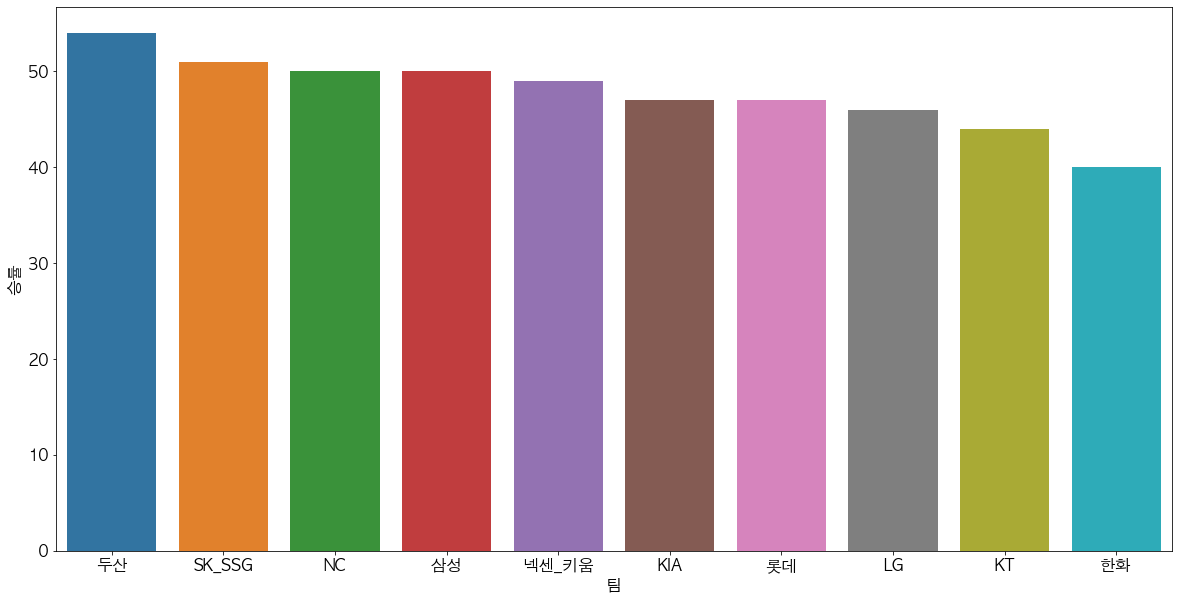

In [18]:
sns.barplot(data=df100, x='팀', y='승률')
# plt.ylim(0, 100)
plt.show()

### 각 팀의 년도별 승률을 구한다.

In [19]:
df4

,경기날짜,팀1이름,팀2이름,팀1점수,팀2점수,결과
0,20080329,롯데,한화,11,1,1
1,20080329,LG,SK_SSG,4,5,0
2,20080329,KIA,삼성,3,4,0
3,20080330,롯데,한화,9,8,1
4,20080330,넥센_키움,두산,1,4,0
...,...,...,...,...,...,...
19021,20211110,두산,삼성,11,3,1
19022,20211114,KT,두산,4,2,1
19023,20211115,KT,두산,6,1,1
19024,20211117,두산,KT,1,3,0


In [20]:
# 원복을 복제한 데이터 프레임을 생성한다.
df5 = df4.copy()
df5

,경기날짜,팀1이름,팀2이름,팀1점수,팀2점수,결과
0,20080329,롯데,한화,11,1,1
1,20080329,LG,SK_SSG,4,5,0
2,20080329,KIA,삼성,3,4,0
3,20080330,롯데,한화,9,8,1
4,20080330,넥센_키움,두산,1,4,0
...,...,...,...,...,...,...
19021,20211110,두산,삼성,11,3,1
19022,20211114,KT,두산,4,2,1
19023,20211115,KT,두산,6,1,1
19024,20211117,두산,KT,1,3,0


In [21]:
# 경기일자의 타입을 확인한다.
df5['경기날짜'].dtype

dtype('int64')

In [22]:
# 경기년도를 구한다.
df5['경기년도'] = df5['경기날짜'] // 10000
df5

,경기날짜,팀1이름,팀2이름,팀1점수,팀2점수,결과,경기년도
0,20080329,롯데,한화,11,1,1,2008
1,20080329,LG,SK_SSG,4,5,0,2008
2,20080329,KIA,삼성,3,4,0,2008
3,20080330,롯데,한화,9,8,1,2008
4,20080330,넥센_키움,두산,1,4,0,2008
...,...,...,...,...,...,...,...
19021,20211110,두산,삼성,11,3,1,2021
19022,20211114,KT,두산,4,2,1,2021
19023,20211115,KT,두산,6,1,1,2021
19024,20211117,두산,KT,1,3,0,2021


In [23]:
# 팀별 년도별 경기 횟수를 구한다.
a1 = df5.groupby(['팀1이름', '경기년도'])['결과'].count()
a1

팀1이름  경기년도
KIA   2008    126
      2009    140
      2010    133
      2011    149
      2012    133
             ... 
한화    2017    156
      2018    154
      2019    152
      2020    150
      2021    151
Name: 결과, Length: 128, dtype: int64

In [24]:
# 팀별 년도별 경기 승리 수를 구한다.
a2 = df5.groupby(['팀1이름', '경기년도'])['결과'].sum()
a2

팀1이름  경기년도
KIA   2008    57
      2009    85
      2010    59
      2011    71
      2012    62
              ..
한화    2017    67
      2018    81
      2019    63
      2020    46
      2021    55
Name: 결과, Length: 128, dtype: int64

In [25]:
# 승률 계산
a3 = a2 / a1 * 100
a3 = a3.astype('int64')
a3

팀1이름  경기년도
KIA   2008    45
      2009    60
      2010    44
      2011    47
      2012    46
              ..
한화    2017    42
      2018    52
      2019    41
      2020    30
      2021    36
Name: 결과, Length: 128, dtype: int64

In [26]:
# 팀이름을 추출한다.
team_list = df4['팀1이름'].value_counts().index
team_list

Index(['두산', 'SK_SSG', '넥센_키움', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT'], dtype='object')

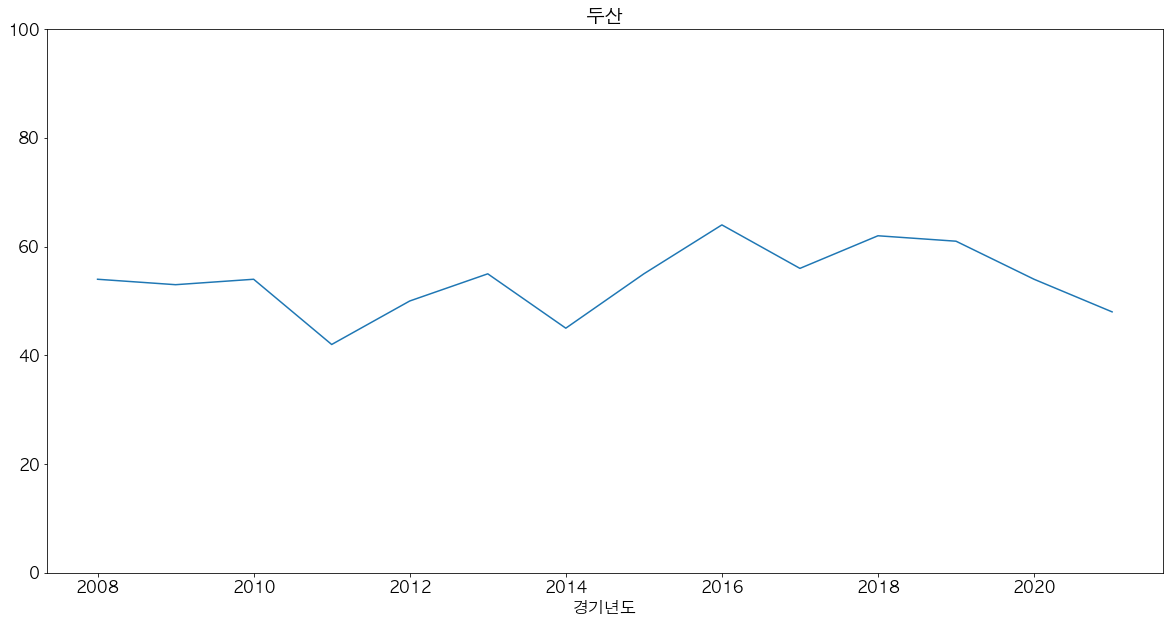

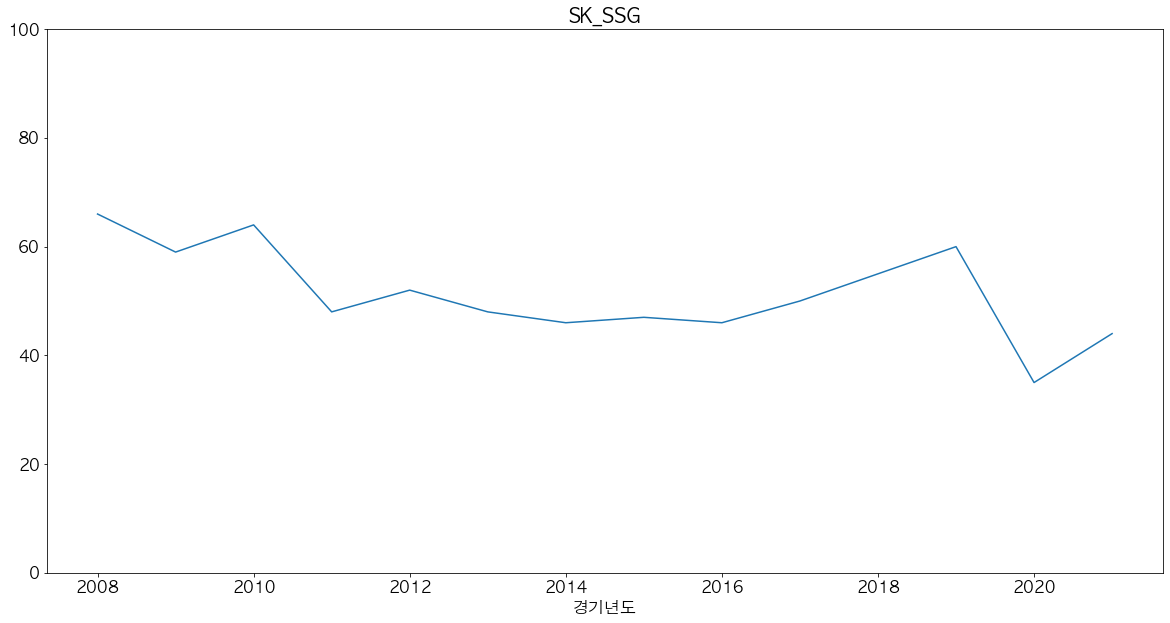

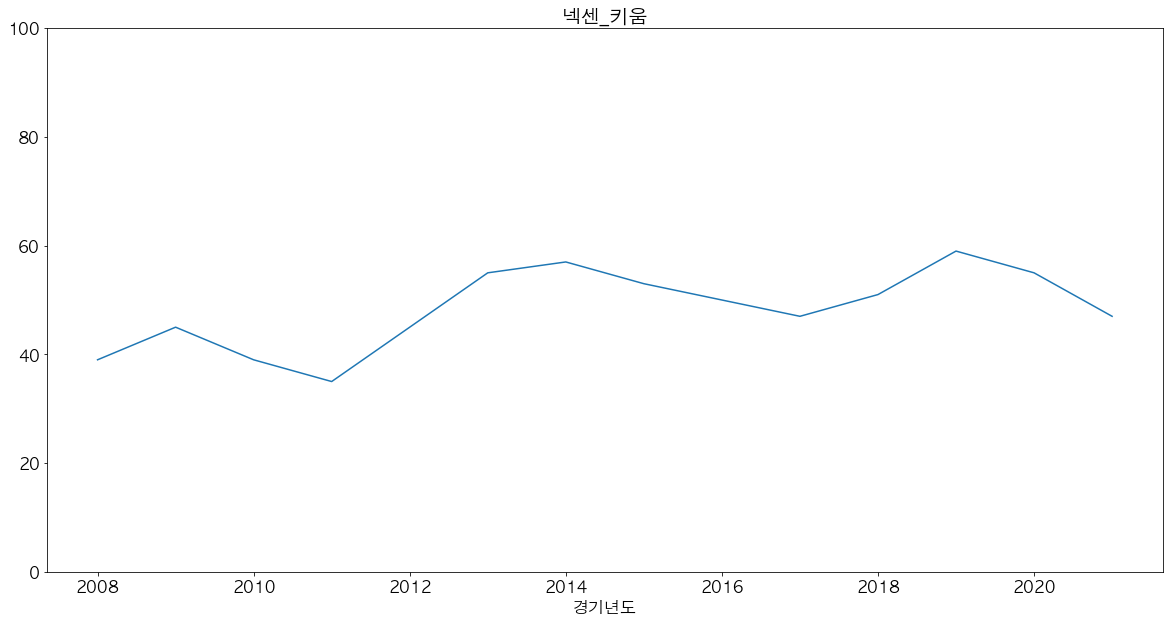

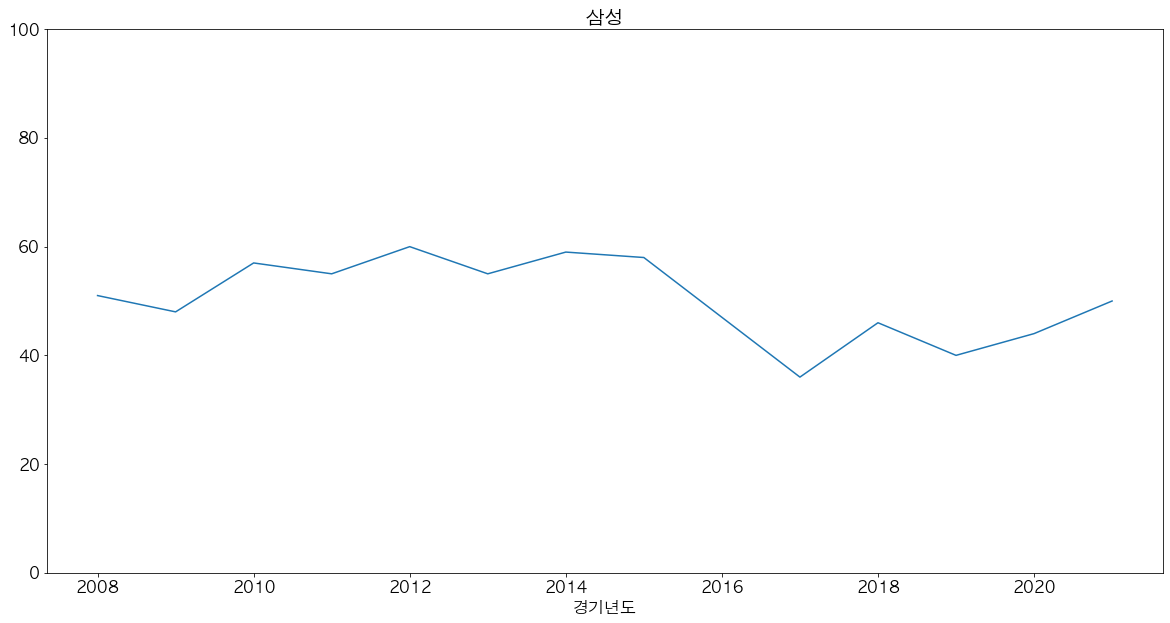

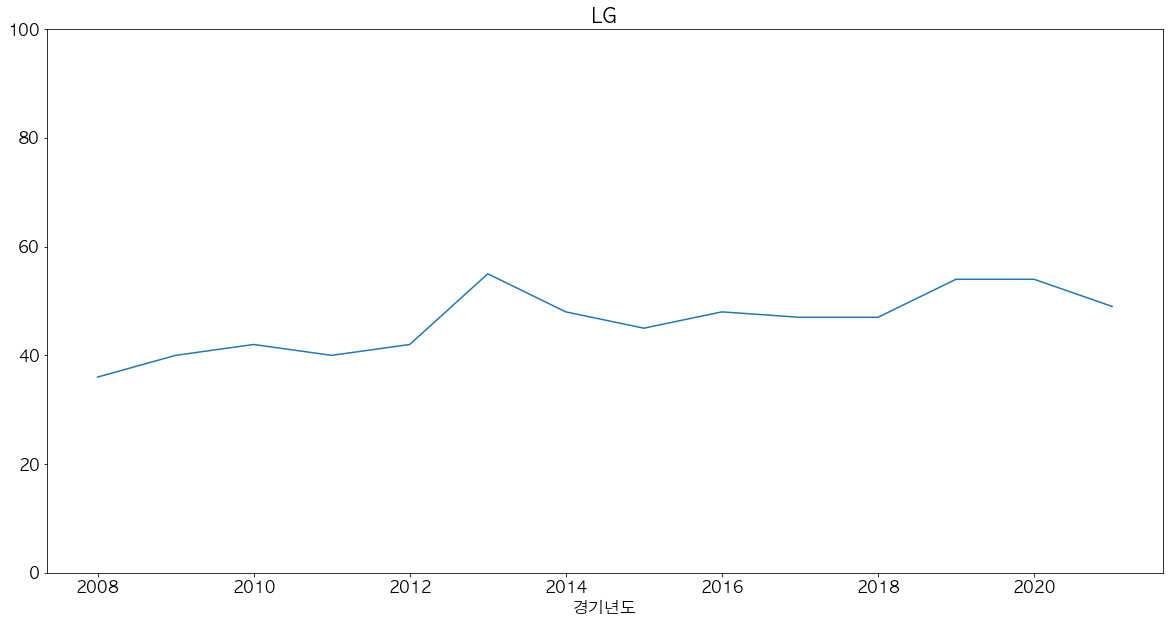

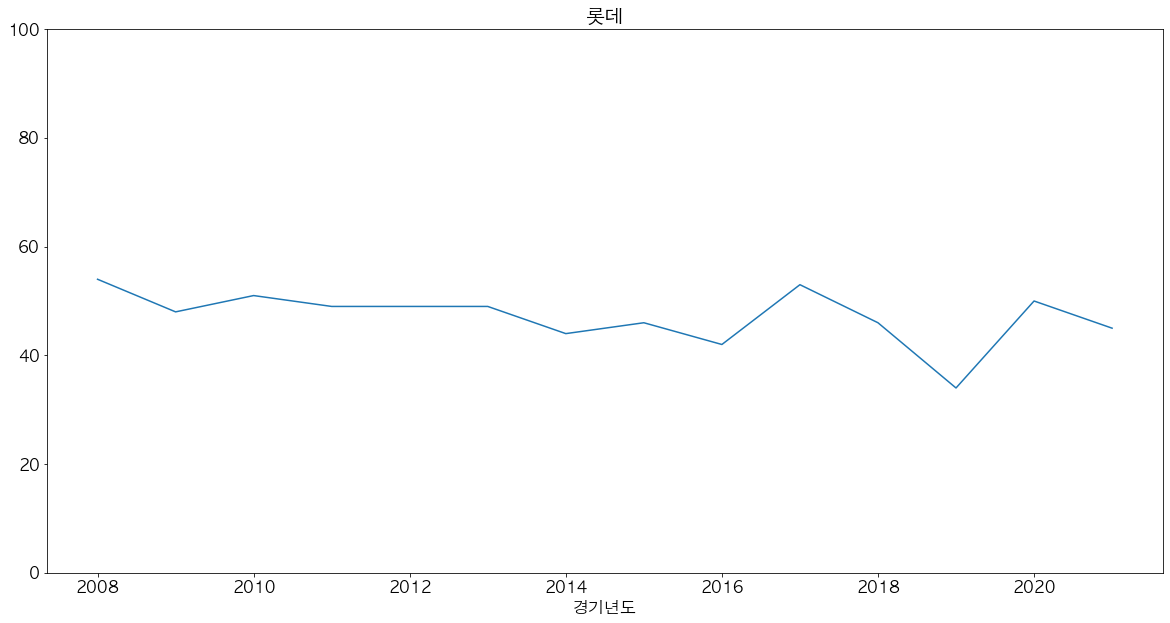

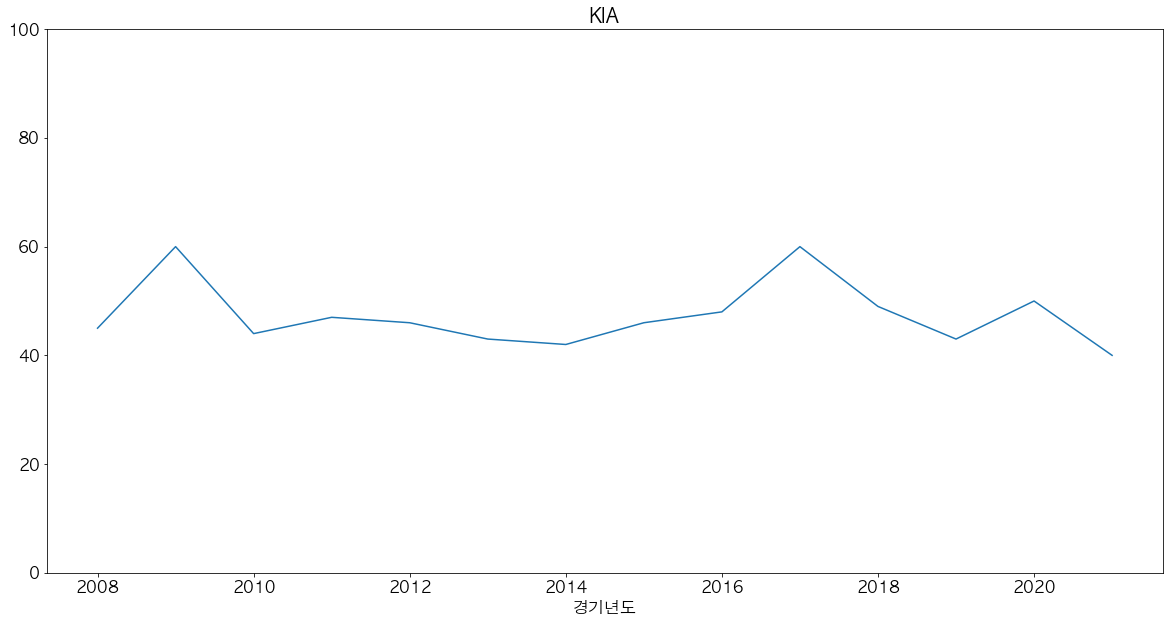

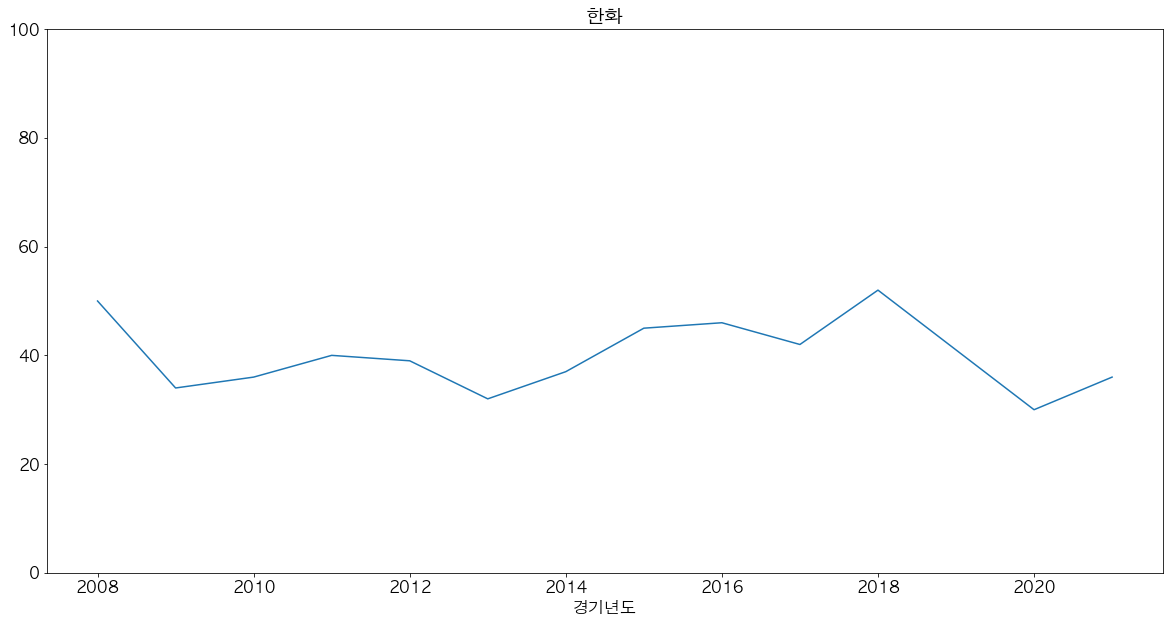

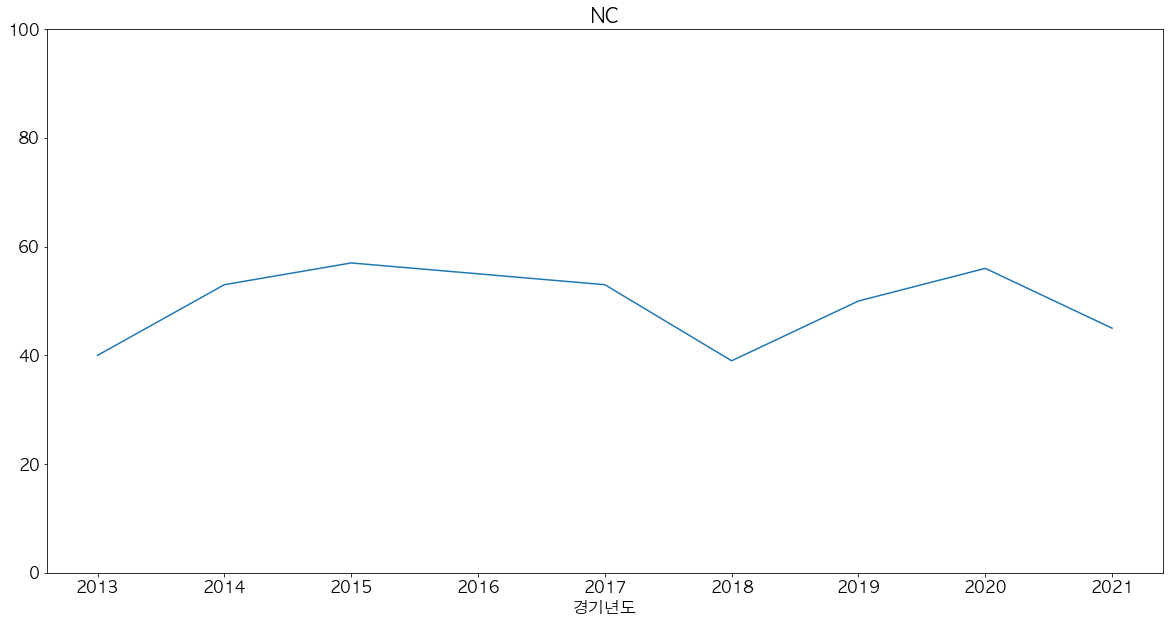

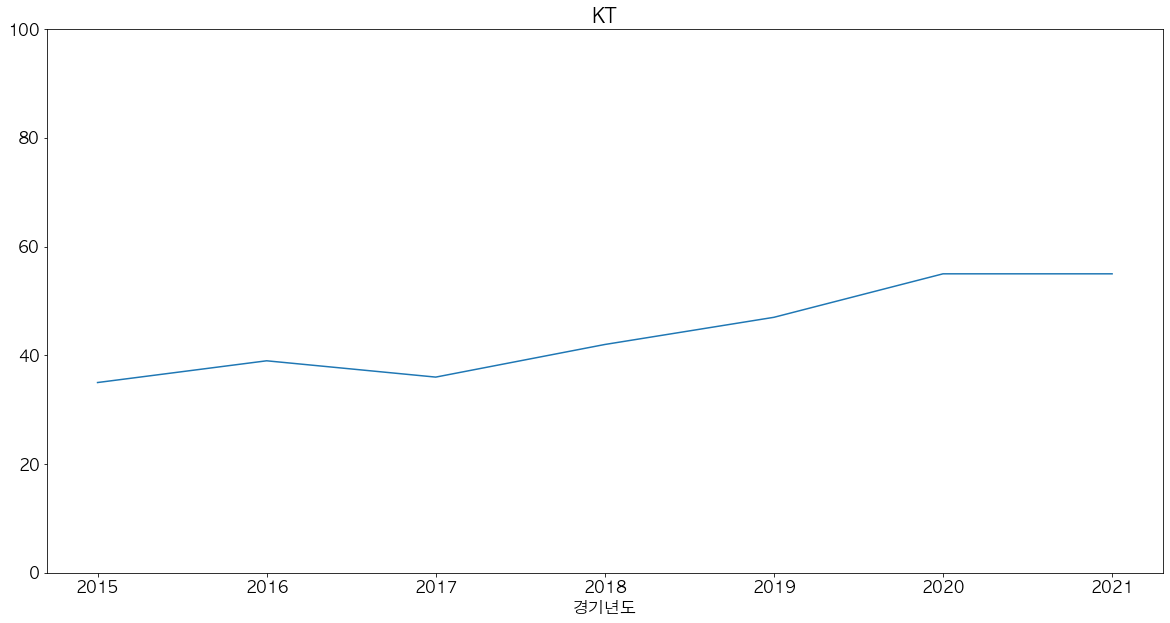

In [27]:
# 팀의 수 만큼 반복한다.
for team_name in team_list :
    # 팀하나의 정보를 추출한다.
    temp_result = a3[team_name]
    
    # 선그래프를 그린다.
    temp_result.plot()
    plt.title(team_name)
    plt.ylim(0, 100)
    plt.show()

### 각 팀별 상대 팀에 대한 승률을 구한다.

In [28]:
# 게임 경기수를 구한다.
a1 = df4.groupby(['팀1이름', '팀2이름'])['결과'].count()
a1

팀1이름  팀2이름  
KIA   KT        120
      LG        249
      NC        158
      SK_SSG    260
      넥센_키움     251
               ... 
한화    SK_SSG    250
      넥센_키움     255
      두산        252
      롯데        250
      삼성        247
Name: 결과, Length: 90, dtype: int64

In [29]:
# 승리수를 구한다.
a2 = df4.groupby(['팀1이름', '팀2이름'])['결과'].sum()
a2

팀1이름  팀2이름  
KIA   KT         60
      LG        119
      NC         71
      SK_SSG    123
      넥센_키움     119
               ... 
한화    SK_SSG     86
      넥센_키움     118
      두산        101
      롯데        101
      삼성         95
Name: 결과, Length: 90, dtype: int64

In [30]:
# 승률을 구한다.
a3 = a2 / a1 * 100
a3 = a3.astype('int64')
a3

팀1이름  팀2이름  
KIA   KT        50
      LG        47
      NC        44
      SK_SSG    47
      넥센_키움     47
                ..
한화    SK_SSG    34
      넥센_키움     46
      두산        40
      롯데        40
      삼성        38
Name: 결과, Length: 90, dtype: int64

In [31]:
# 팀 목록을 가져온다.
team_list = df4['팀1이름'].value_counts().index
team_list

Index(['두산', 'SK_SSG', '넥센_키움', '삼성', 'LG', '롯데', 'KIA', '한화', 'NC', 'KT'], dtype='object')

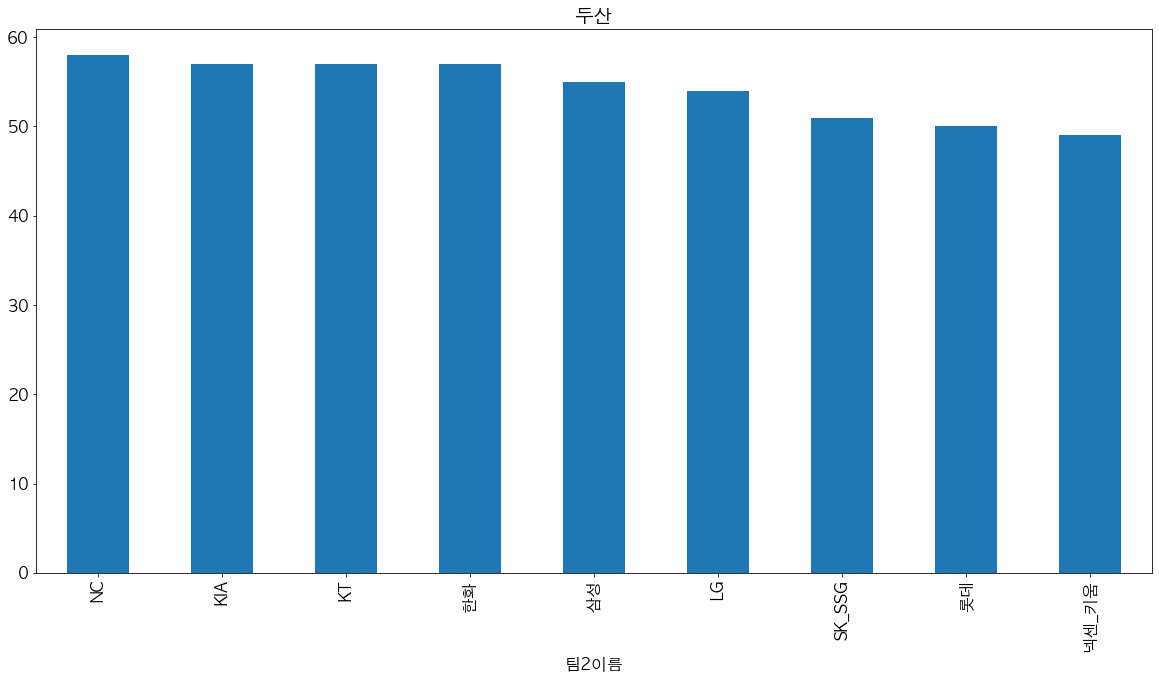

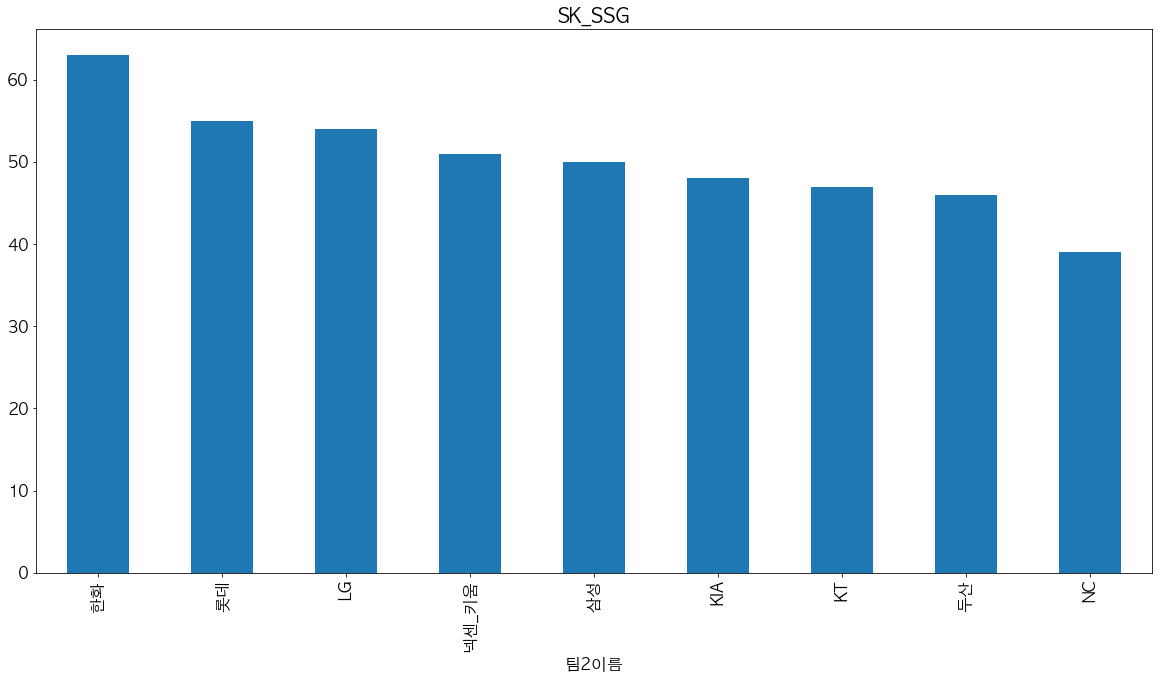

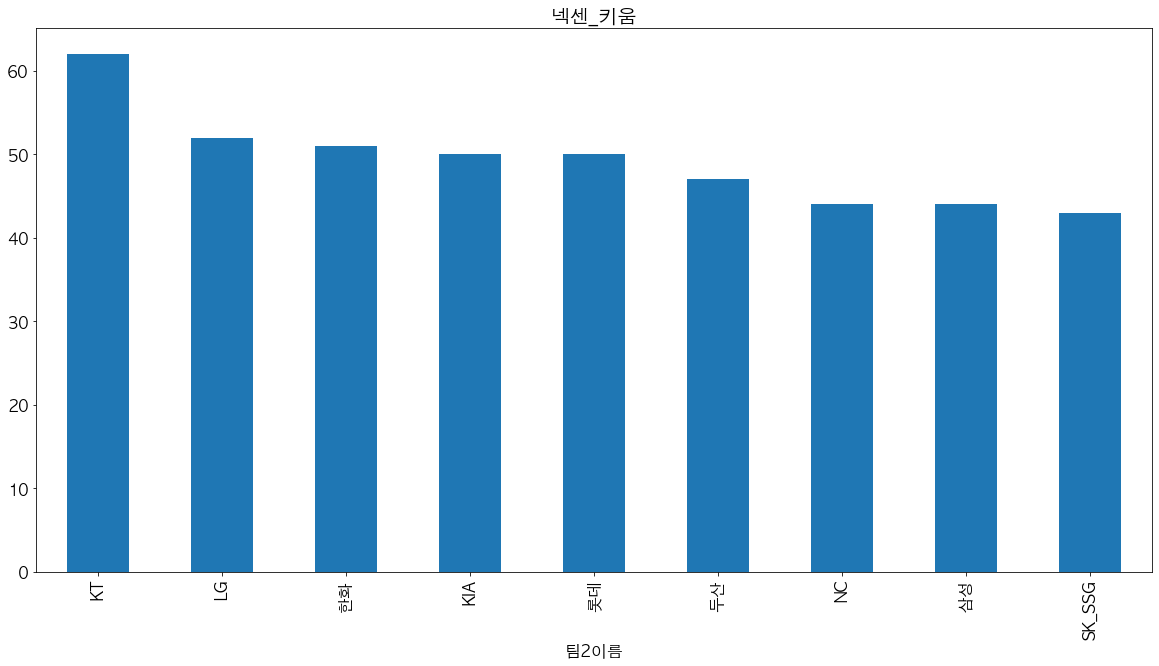

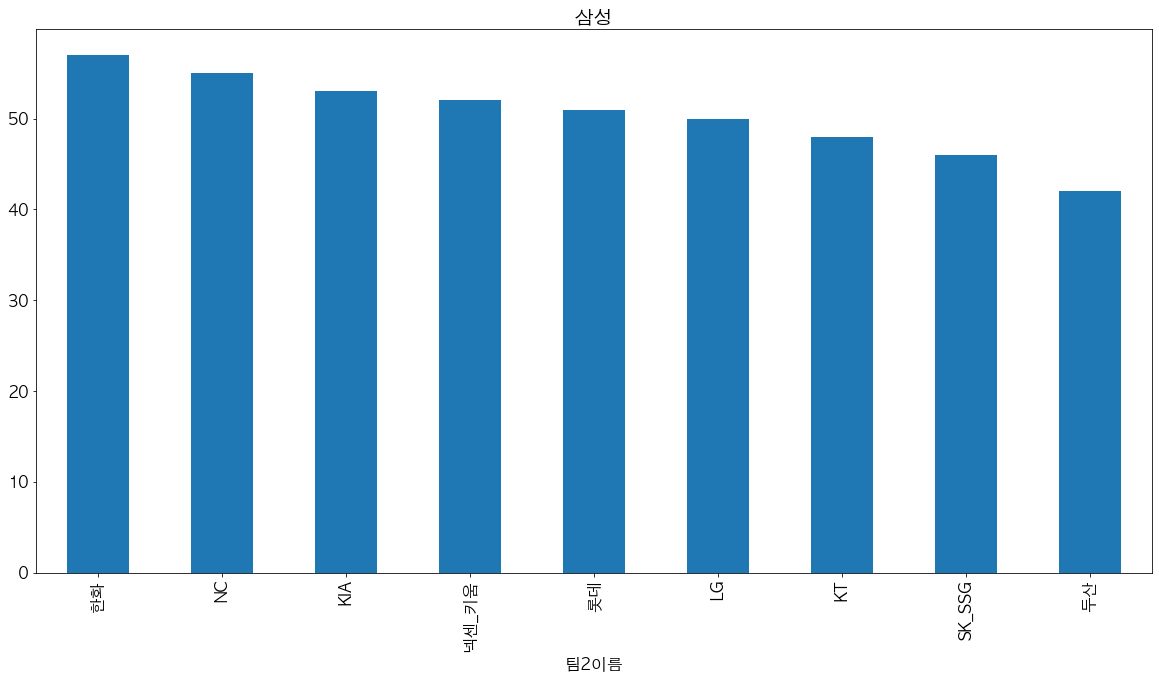

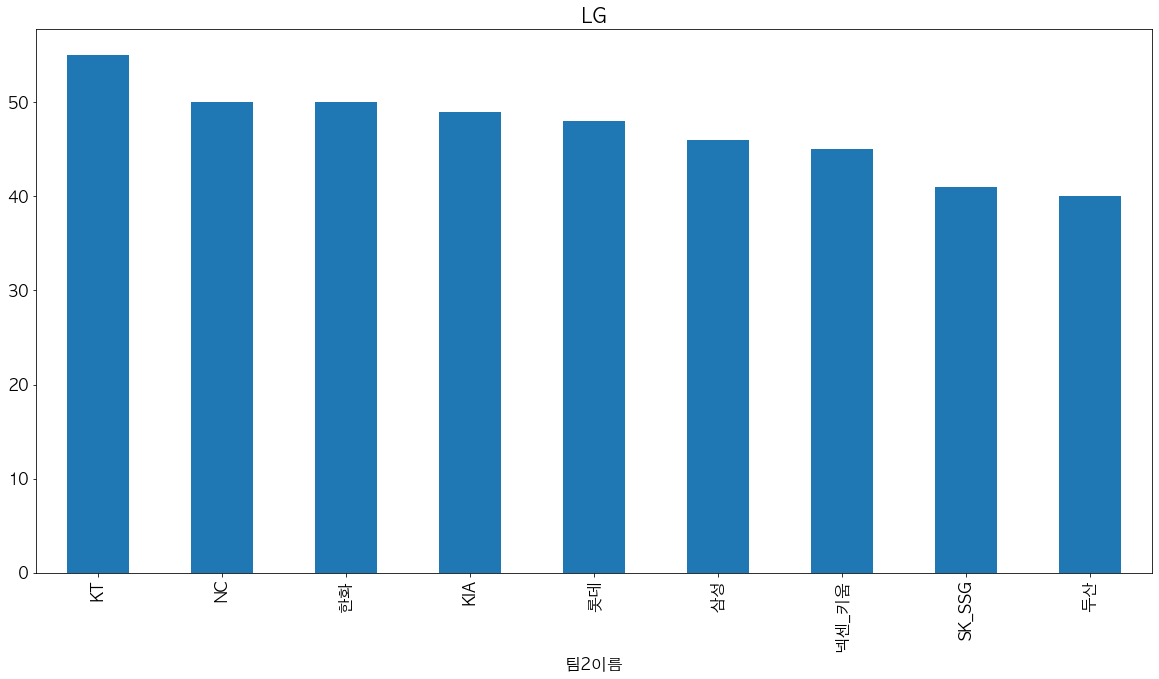

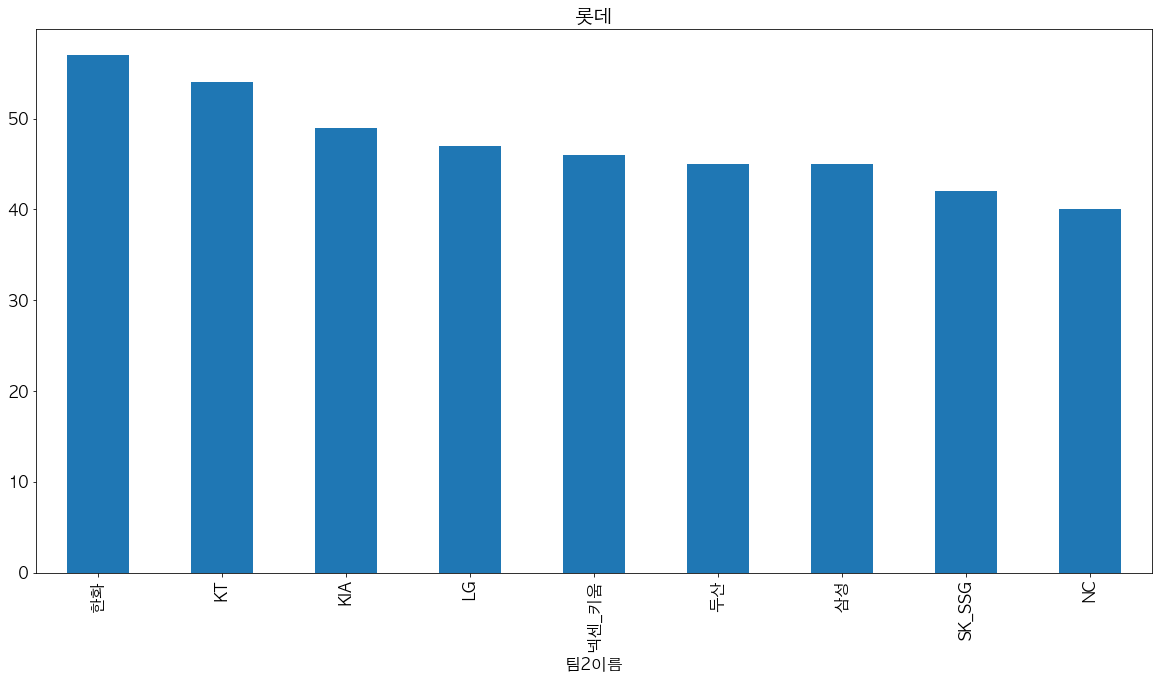

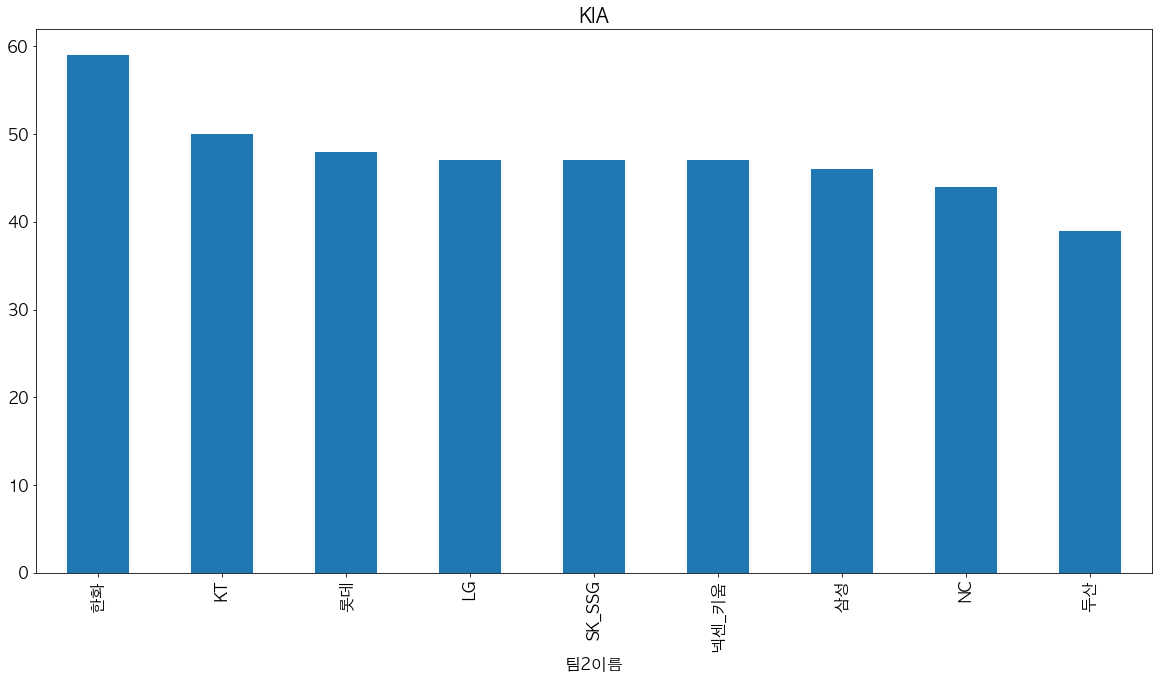

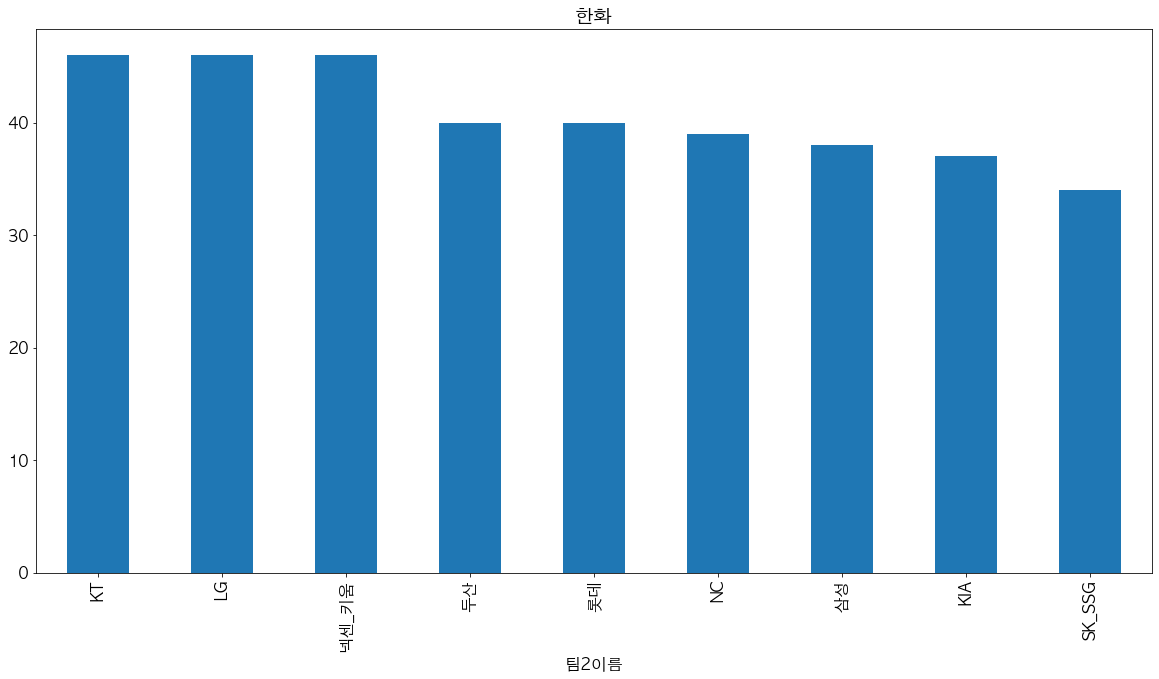

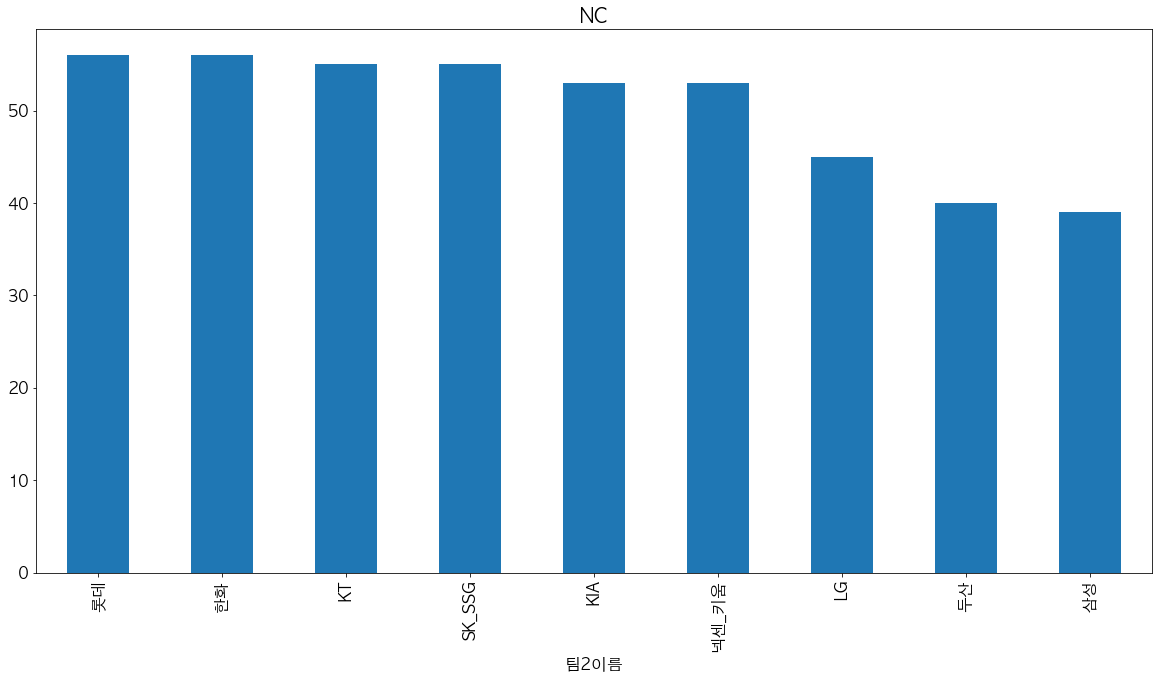

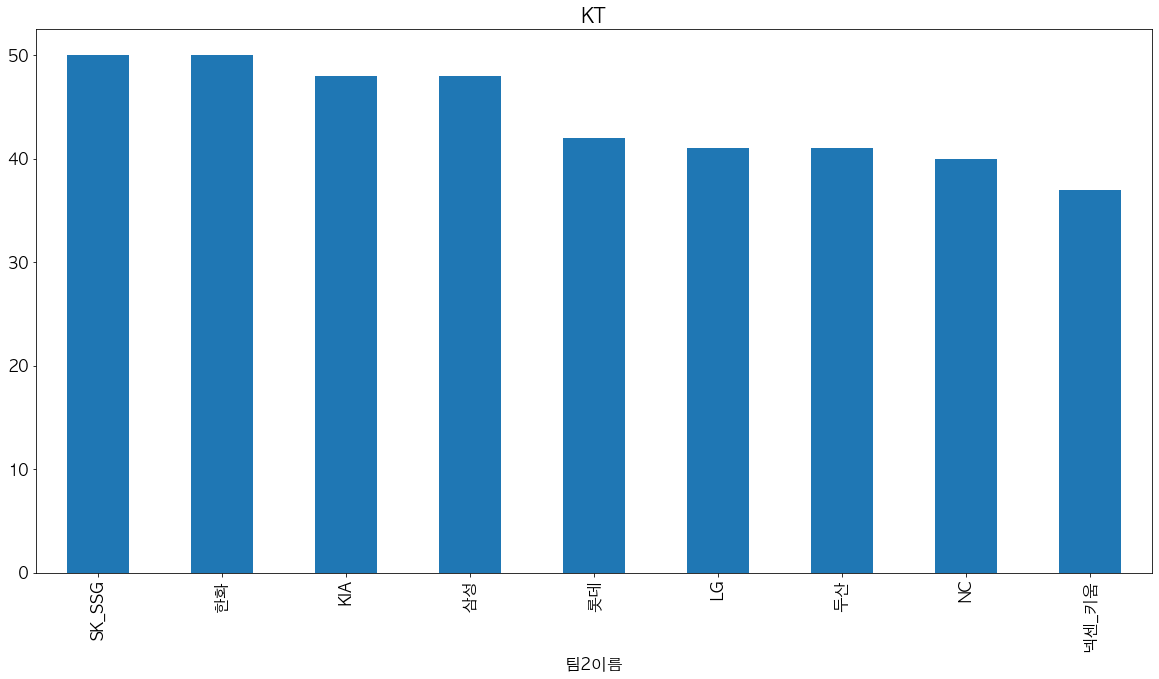

In [32]:
# 기본 그래프
for team_name in team_list :
    # 해당 팀 결과를 가져온다.
    a4 = a3[team_name]
    
    # 정렬한다.
    a4 = a4.sort_values(ascending=False)
    
    # 그린다.
    a4.plot.bar()
    plt.title(team_name)
    plt.show()

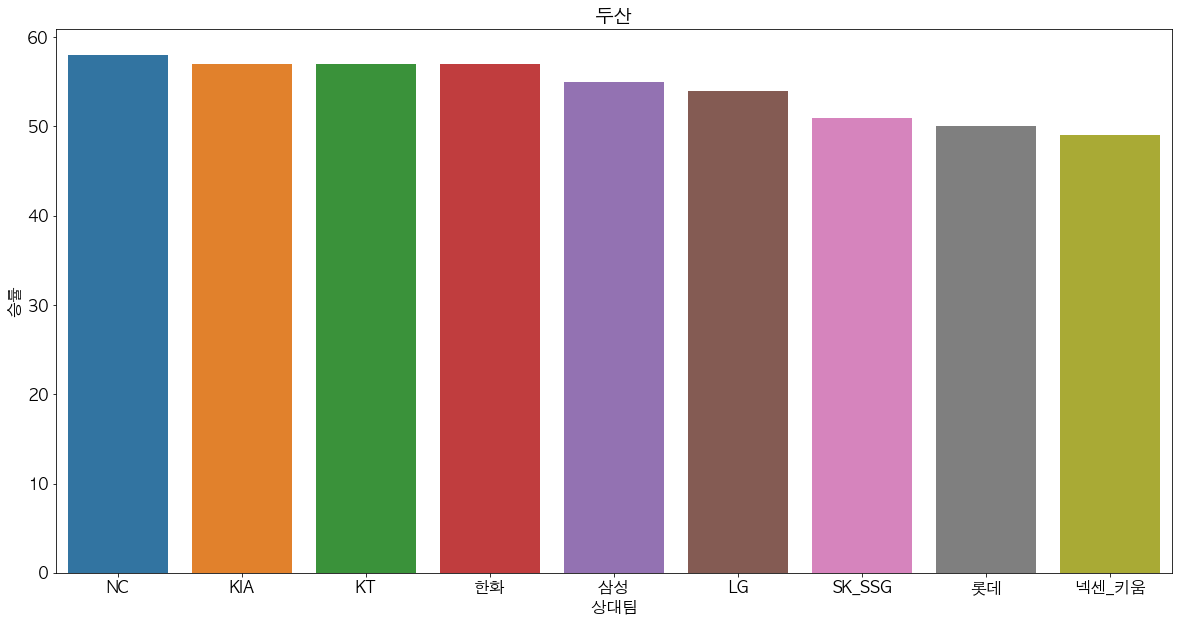

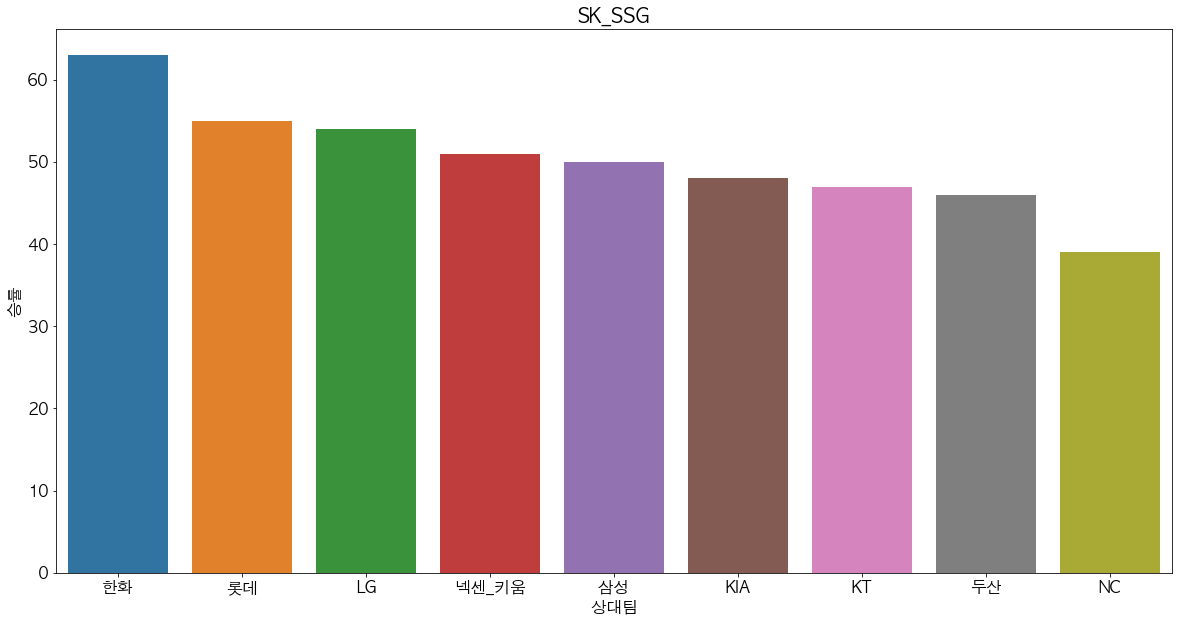

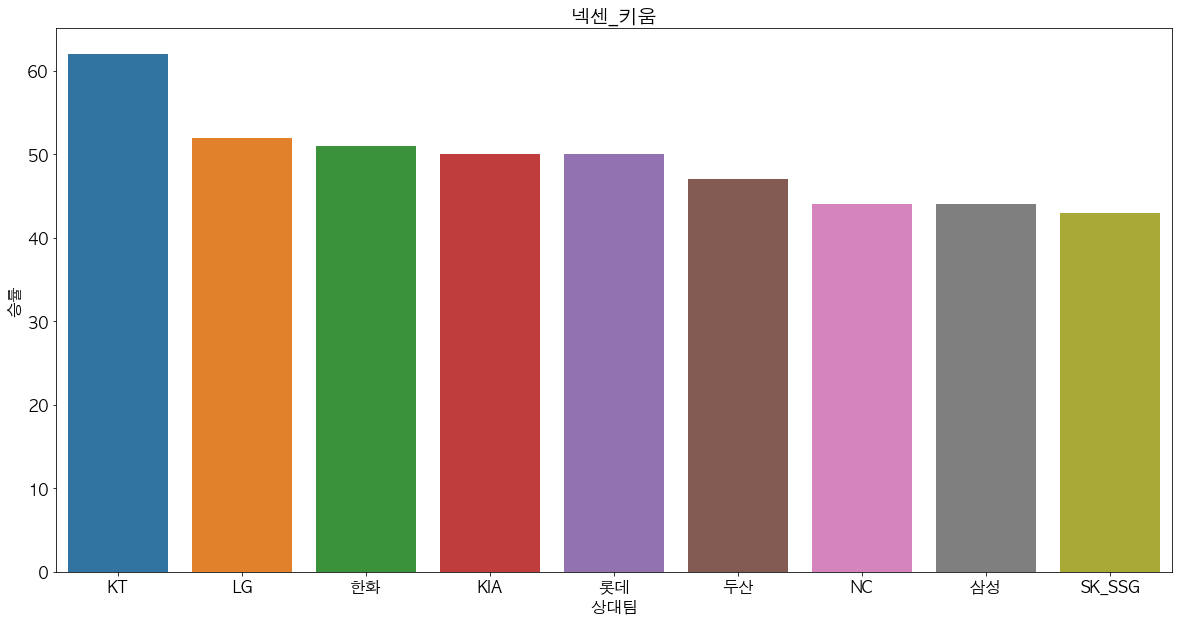

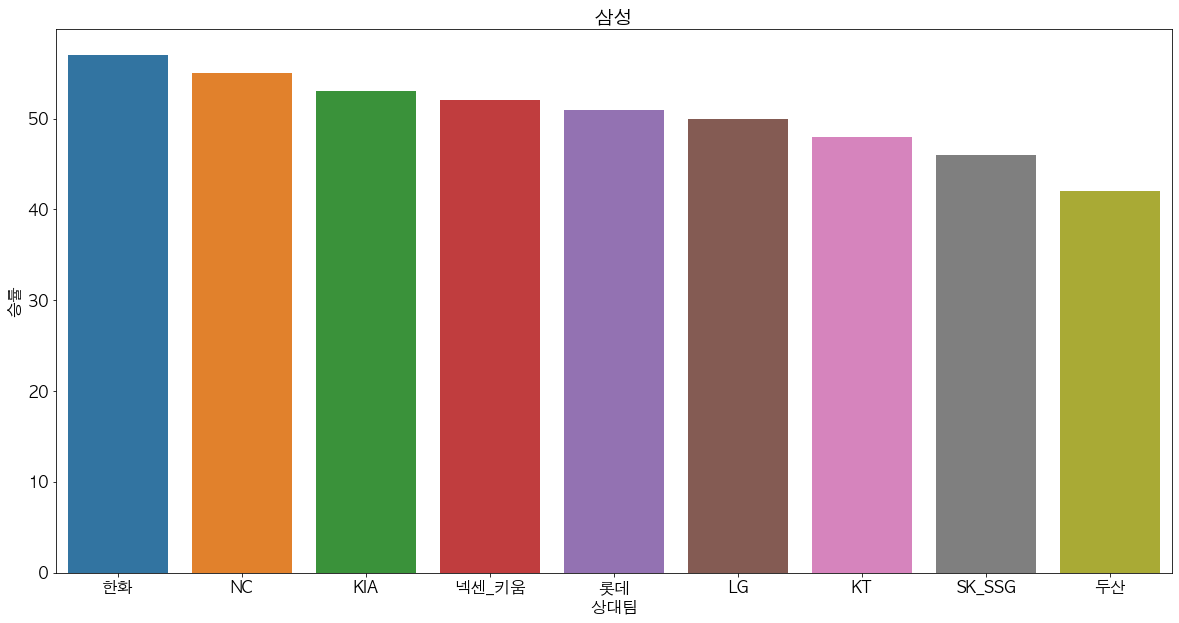

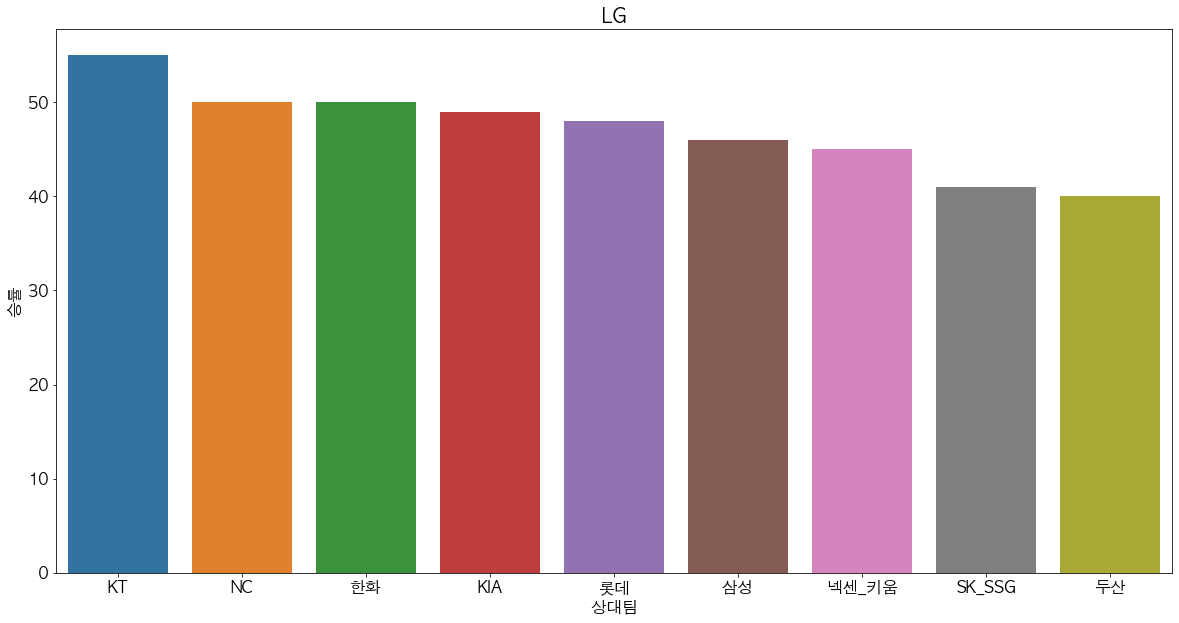

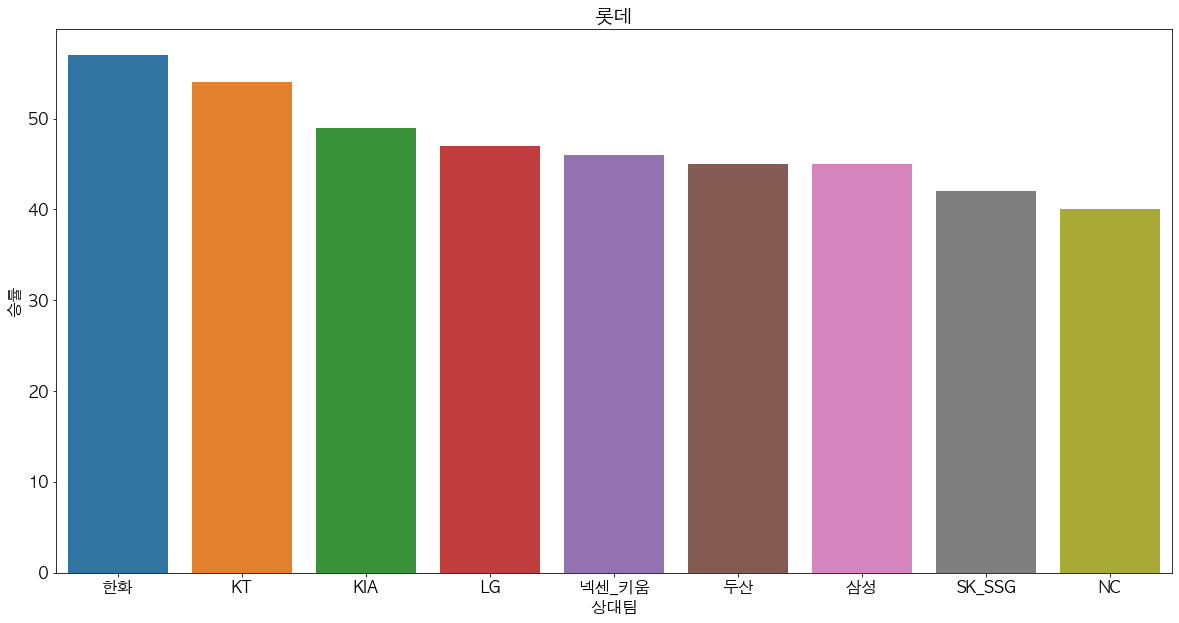

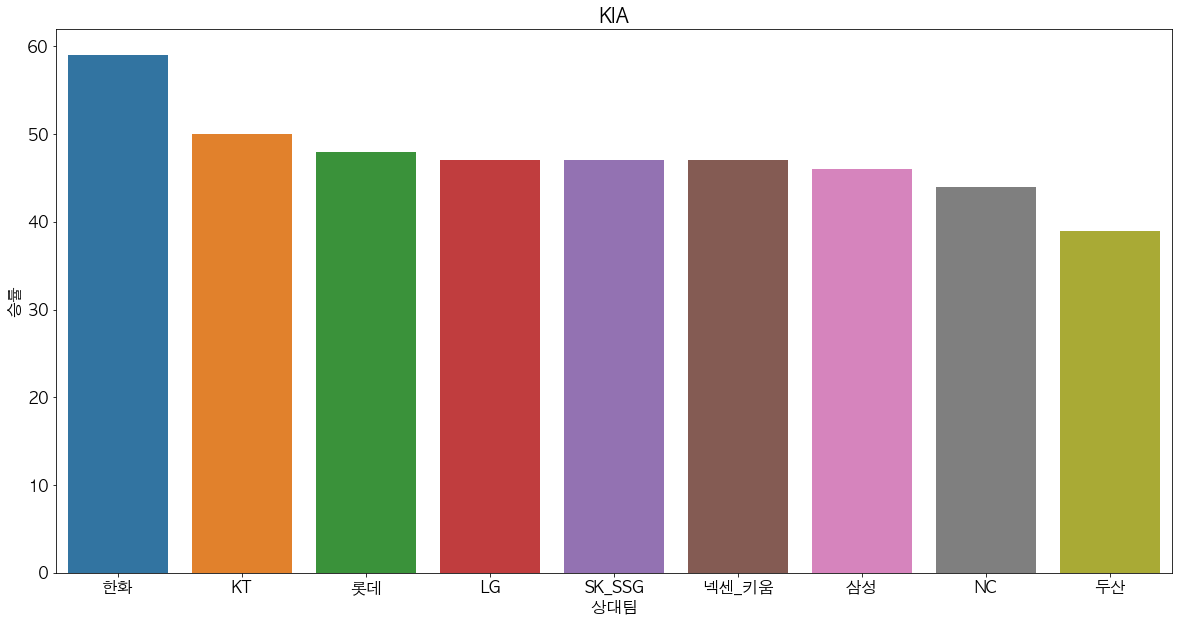

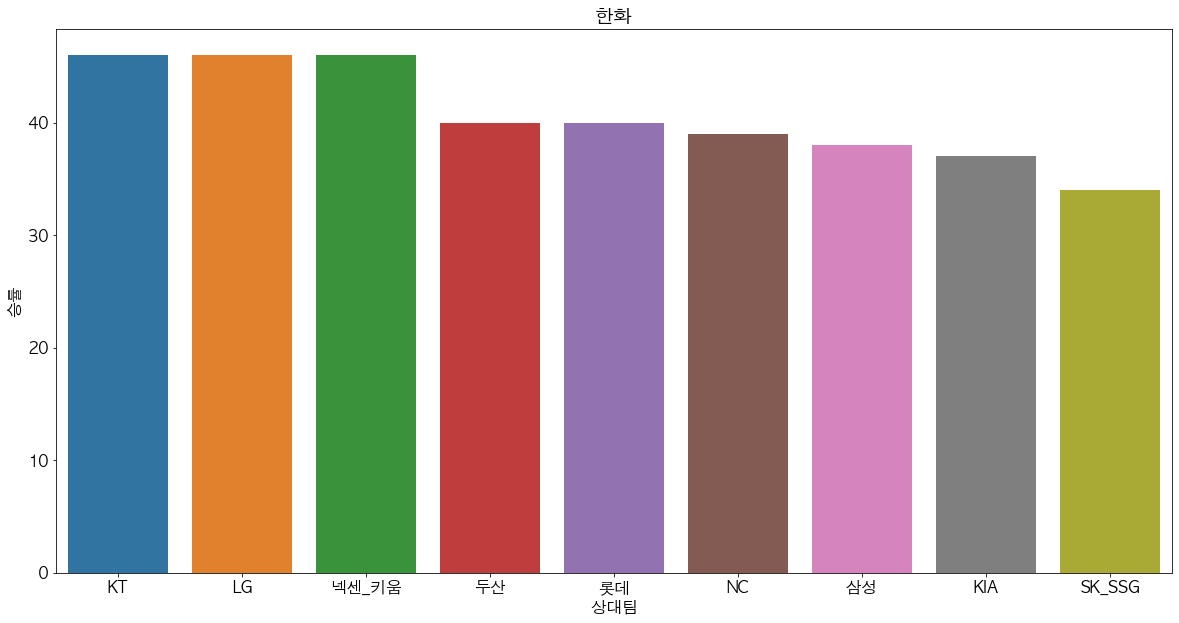

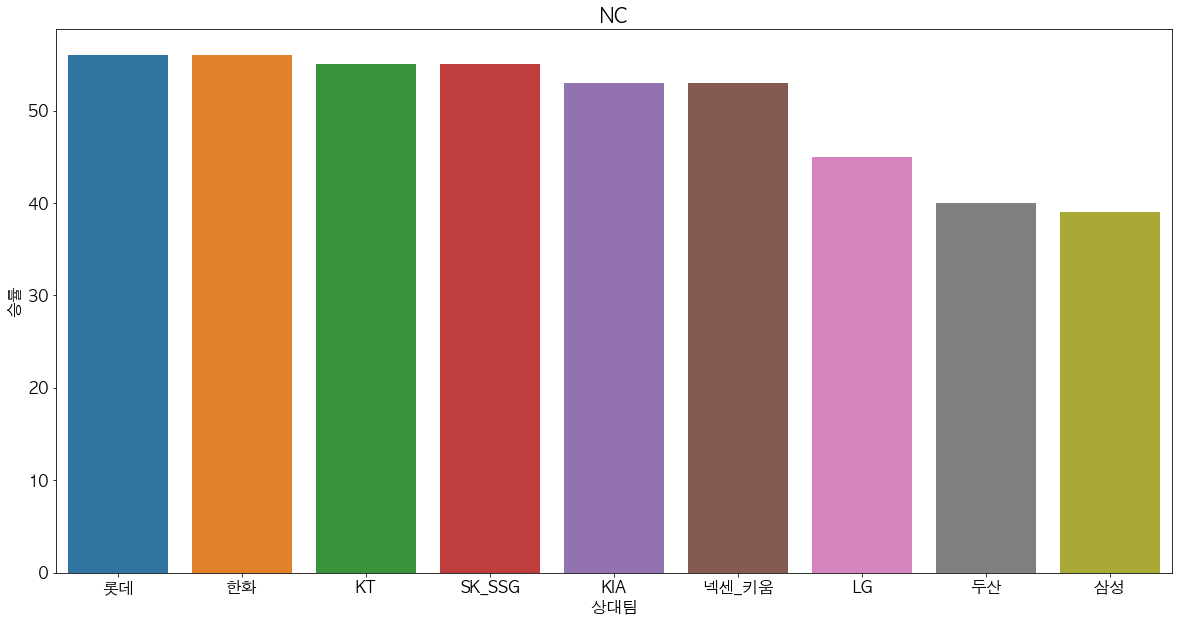

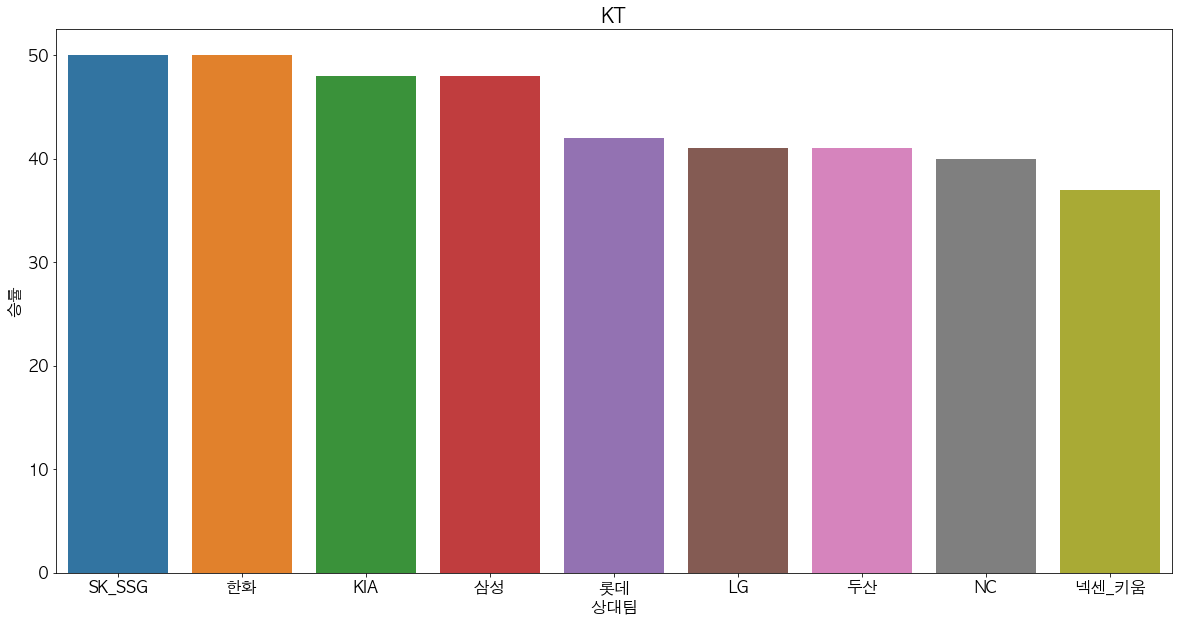

In [33]:
# seaborn
for team_name in team_list :
    # 해당 팀 결과를 가져온다.
    a4 = a3[team_name]
    
    # 정렬한다.
    a4 = a4.sort_values(ascending=False)
    
    # 데이터 프레임 생성
    a5 = pd.DataFrame(a4)
    # display(a5)
    
    # 인덱스를 컬럼에 포함시킨다.
    a5.reset_index(inplace=True)
    a5.columns = ['상대팀', '승률']
    # display(a5)
    
    sns.barplot(data=a5, x='상대팀', y='승률')
    plt.title(team_name)
    plt.show()

In [34]:
# 상위 3개팀을 추출해서 각 팀별 상위 3개팀 출현 횟수를 구해
# 동네 북을 찾는다.

# 상위 3팀의 이름을 담을 리스트
top3_list = []

# 팀의 수 만큼 반복한다.
for team_name in team_list :
    # 해당 팀의 결과를 가져온다.
    r1 = a3[team_name]
    
    # 값을 기준으로 정렬한다.
    r2 = r1.sort_values(ascending=False)
    
    # 상위 3개의 인덱스를 추출한다.
    r3 = r2[:3].index
    # 리스트로 변환한다.
    r4 = list(r3)
    # top3_list와 더한다.
    top3_list = top3_list + r4
    
print(top3_list)

['NC', 'KIA', 'KT', '한화', '롯데', 'LG', 'KT', 'LG', '한화', '한화', 'NC', 'KIA', 'KT', 'NC', '한화', '한화', 'KT', 'KIA', '한화', 'KT', '롯데', 'KT', 'LG', '넥센_키움', '롯데', '한화', 'KT', 'SK_SSG', '한화', 'KIA']


In [35]:
# Series를 생성한다.
a1 = pd.Series(top3_list)
# 각 이름이 몇번 나오는가...
a2 = a1.value_counts()
# 횟수를 기준으로 정렬한다
a3 = a2.sort_values(ascending=False)
a3

한화        8
KT        7
KIA       4
NC        3
롯데        3
LG        3
넥센_키움     1
SK_SSG    1
dtype: int64

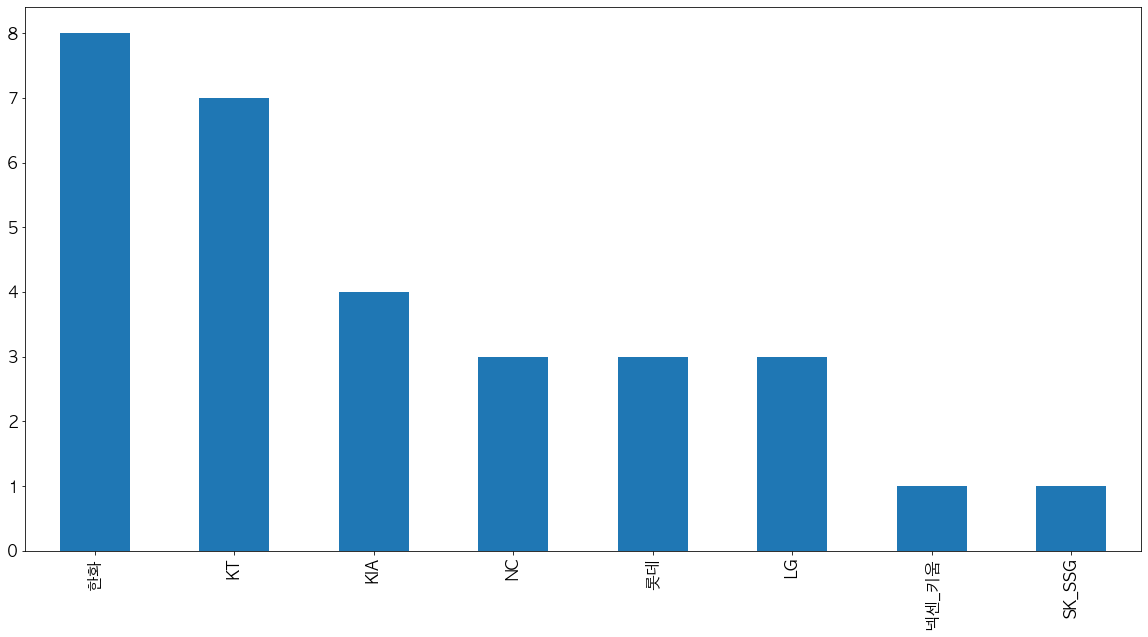

In [36]:
a3.plot.bar()
plt.show()